In [12]:
!pip install kaggle
from google.colab import files
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from numpy import loadtxt, sort
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import SelectFromModel
scaler = MinMaxScaler(feature_range=(0, 1))

# Setup

In [ ]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [2]:
#!pip install gresearch_crypto

ERROR: Could not find a version that satisfies the requirement gresearch_crypto (from versions: none)
ERROR: No matching distribution found for gresearch_crypto


# Local Setup

Below, please upload the .json file from your Kaggle API authentication.

In [3]:
#From open source.
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [4]:
!kaggle competitions download -c g-research-crypto-forecasting

  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 37.8kB/s]
  0% 0.00/458k [00:00<?, ?B/s]
100% 458k/458k [00:00<00:00, 62.2MB/s]
  0% 0.00/5.78k [00:00<?, ?B/s]
100% 5.78k/5.78k [00:00<00:00, 15.0MB/s]
  0% 0.00/406 [00:00<?, ?B/s]
100% 406/406 [00:00<00:00, 834kB/s]
100% 116M/116M [00:04<00:00, 37.5MB/s]

  0% 0.00/444 [00:00<?, ?B/s]
100% 444/444 [00:00<00:00, 91.6kB/s]
100% 1.02G/1.02G [00:33<00:00, 46.9MB/s]
100% 1.02G/1.02G [00:33<00:00, 32.8MB/s]


In [5]:
training_data = pd.read_csv('train.csv.zip')  

#Functions:

In [6]:
def Get_N_Asset(N):
  """Returns a cleaned array of an assets data"""
  data = training_data[training_data["Asset_ID"]==N].to_numpy()
  imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer.fit(data)
  ouput = imputer.transform(data)
  return ouput

# KNN - Zain Fox

0.001266188694797544

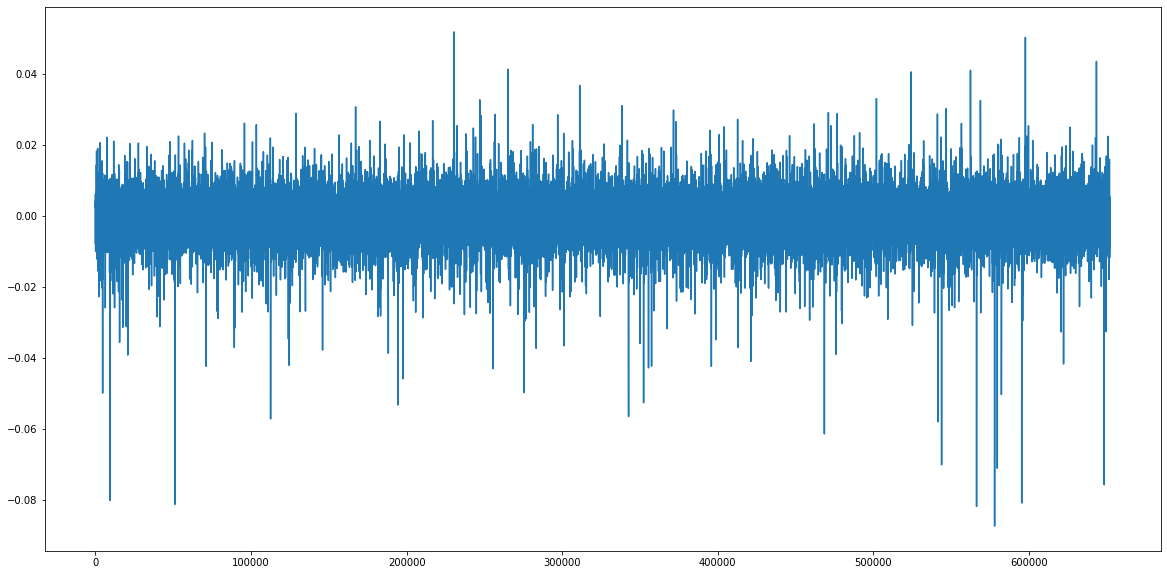

In [ ]:
def Analyse_KNN(asset, plot=False):
  Asset_1 = Get_N_Asset(asset)

  X, y = Asset_1[:, :-1], Asset_1[:, -1]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

  X_train_scaled = scaler.fit_transform(X_train)
  X_train = pd.DataFrame(X_train_scaled)
  X_test_scaled = scaler.fit_transform(X_test)
  X_test = pd.DataFrame(X_test_scaled)

  params = {'n_neighbors':[15]}
  knn = neighbors.KNeighborsRegressor()
  model = GridSearchCV(knn, params, cv=5)

  y_pred = model.fit(X_train,y_train).predict(X_test)

  if plot == True:
    fig = plt.figure(figsize=(20,10))
    plt.plot(y_pred-y_test)
  return(metrics.mean_absolute_error(y_test, y_pred))

Analyse_KNN(1, True)

In [ ]:
print("Mean Errors for Each Asset when using KNN Predictions")
for i in range(0,9):
  print(i, "->", Analyse_KNN(i, plot=False))

Mean Errors for Each Asset when using KNN Predictions
0 -> 0.003164646134141437
1 -> 0.001266188694797544
2 -> 0.003338245074949269
3 -> 0.0031088841370240563
4 -> 0.003473248819968015
5 -> 0.002858807417968657
6 -> 0.0016509727224792016
7 -> 0.004968889007597028
8 -> 0.005059231722222165


#Linear Regressor - Egor Scharapkin

0.0012355074956624554

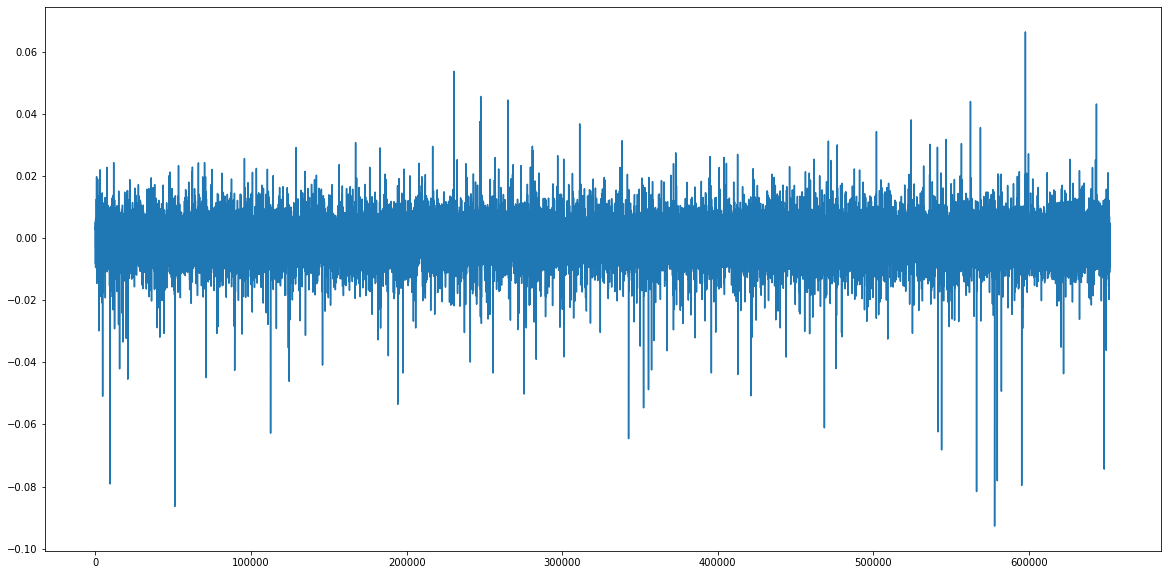

In [ ]:
def Analyse_LinReg(asset, plot=False):
  Asset = Get_N_Asset(asset)
  X, y = Asset[:, :-1], Asset[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
  regr = linear_model.LinearRegression()
  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)
  if plot ==True:
    fig = plt.figure(figsize=(20,10))
    plt.plot(y_pred-y_test)
  return(metrics.mean_absolute_error(y_test, y_pred))
Analyse_LinReg(1, True)

In [ ]:
print("Mean Errors for Each Asset when using Linear Regression Predictions")
for i in range(0,9):
  print(i, "->", Analyse_LinReg(i, plot=False))

Mean Errors for Each Asset when using Linear Regression Predictions
0 -> 0.003042508901232541
1 -> 0.0012355074956624554
2 -> 0.0027863897467540547
3 -> 0.002805708076733322
4 -> 0.003431934902931777
5 -> 0.0027397530654699894
6 -> 0.0016191011107100242
7 -> 0.0045382640416798655
8 -> 0.004274478641569934


# XGBoost - Kostya Popov + James Widdowson 

Threshold =  , n = 4


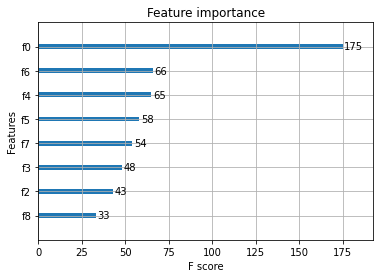

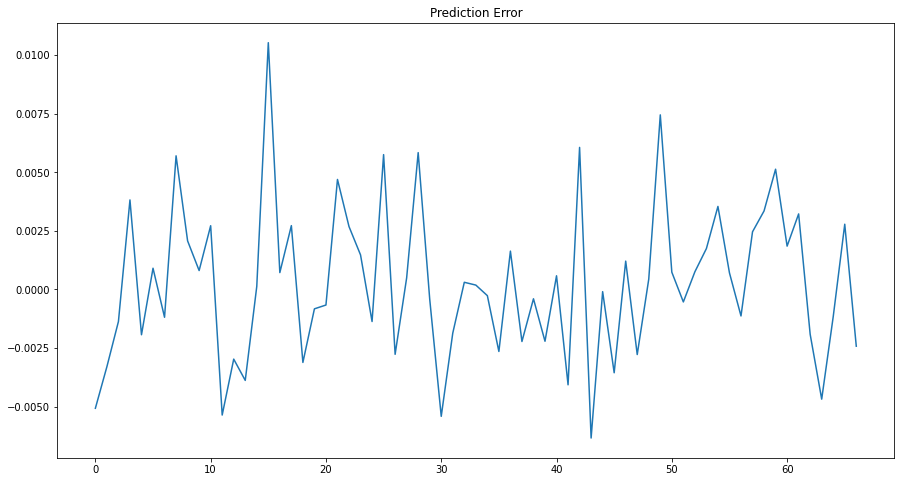

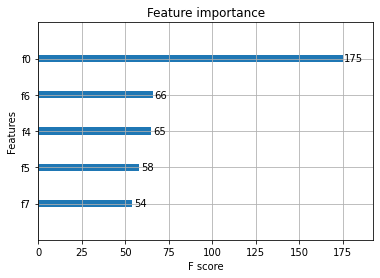

Score:97.5430390770231


In [17]:
# split data into X and y. Also very conventional ML. I took the data to be 67% for training and the remaining for test. For asset 1.

Asset_1 = Get_N_Asset(1)
Asset_1 = Asset_1[:200,:]
X, y = Asset_1[:, :-1], Asset_1[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# fit model on training data
model = XGBRegressor(objective ='reg:squarederror',n_estimators = 500)
model.fit(X_train, y_train)

# make predictions for test data and somehow I want to evaluate the predictions.
predictions = model.predict(X_test)


#print(model.feature_importances_)


"""Here I will iterate over thresholds which contains the importance of each independent variable, which depends on how often
   this dependent variable is used  to construct the tree decision models i.e. by how much does a small change in this variable affect performance.
   What happens next is that pre-trained model is passed and via transform is reduced to the selected features, which in turn depend on the threshold
   (values with higher or equal importance are chosen).
   After training the model, I once again select the test data on which I will run my boosting and evaluate the model using the same selected features.
   """

selection = SelectFromModel(model,prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBRegressor(objective ='reg:squarederror')
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)
# accuracy = accuracy_score(y_test, predictions)
print("Threshold =  , n = {0}".format(select_X_train.shape[1]))


#I plot the importance of parameters, top 5 parameters and the difference between what we predicted and the actual test output data.
plot_importance(model)
pyplot.show()

metrics.mean_absolute_error(y_test, predictions)
fig = plt.figure(figsize=(15,8))
plt.title("Prediction Error")
plt.plot(predictions-y_test)

# Plot the top 5 features
plot_importance(model, max_num_features=5)
# Show the plot
plt.show()

score = model.score(X_train,y_train)
print("Score:{0}".format(score*100))

In [16]:
for i in range(0, 9):
  Asset_1 = Get_N_Asset(i)
  Asset_1 = Asset_1[:200,:]
  X, y = Asset_1[:, :-1], Asset_1[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

  # fit model on training data
  model = XGBRegressor(objective ='reg:squarederror',n_estimators = 500)
  model.fit(X_train, y_train)

  # make predictions for test data and somehow I want to evaluate the predictions.
  y_pred = model.predict(X_test)
  print("Mean Prediction Error of Asset {0}: {1}".format(i, metrics.mean_absolute_error(y_test, y_pred)))

Mean Prediction Error of Asset 0: 0.002852744519979083
Mean Prediction Error of Asset 1: 0.002465313904287062
Mean Prediction Error of Asset 2: 0.0037599587653529983
Mean Prediction Error of Asset 3: 0.003721369815465916
Mean Prediction Error of Asset 4: 0.002140114669788495
Mean Prediction Error of Asset 5: 0.003717802371567731
Mean Prediction Error of Asset 6: 0.001233465576129367
Mean Prediction Error of Asset 7: 0.009701480759813618
Mean Prediction Error of Asset 8: 0.0027669596758117232


So, the XGBoost has the lowest mean error, we shall use this going forward.

In [ ]:
training_data = pd.read_csv('../input/g-research-crypto-forecasting/train.csv') 

for i in range(0, 9):
  Asset_1 = Get_N_Asset(i)
  Asset_1 = Asset_1[:200,:]
  X, y = Asset_1[:, :-1], Asset_1[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

  # fit model on training data
  model = XGBRegressor(objective ='reg:squarederror',n_estimators = 500)
  model.fit(X_train, y_train)

  # make predictions for test data and somehow I want to evaluate the predictions.
  y_pred = model.predict(X_test)
  print("Mean Prediction Error of Asset {0}: {1}".format(i, metrics.mean_absolute_error(y_test, y_pred)))